## Traveling Sales Person Problem

### Objective ###

Generate 50 random locations with x and y coordinates ranging from 0 to 1000 and random initial path. Compute the initial total distance which is the distance from the initial starting point to the 2nd location, up to the last location, and from the last location going back to the initial location. Perform Simulated Annealing to find a better path.

### Method ##

   - Generate 50 random locations with x and y coordinates ranging from 0 to 1000
   - Generate random initial path
   - Compute the distance for each path (from one location to another)
   - Compute the distance of the whole path (from first point up to last point and going back to the first point)
   - Perform Simulated Annealing
   - Determine the new path and compute the path's total distance

### Analysis ##

   - Euclidean distance formula can be used to compute the distance from one location to another
       - dist(A,B) = sqrt((B[0] - A[0])\*\*2 - (B\[1\] \-\ A\[1\])\*\*2)
   - Generate 2 random numbers to determine which cities will be swap on the next iteration
   - Randomly swap two cities in the path
   - If this new path is shorter, accept it. Otherwise accept it with probability p
   - p = exp((old distance - new distance)/k) where k is the temperature of the system
   - If the new solution is strictly better, meaning new distance < old distance, then accept the new path
   - If the new solution is equal or worse, compute p and generate random probability. If p is better than the generated random probability, accept new path.
   - The new path's total distance is better compared to the initial path's total distance. However, we are not guaranteed that the path is the optimal path


In [1]:
#Importing libraries
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Generating Locations
locations = []
location_X = []
location_Y = []
random.seed(1000)
for i in range(50):
    loc = tuple(random.sample(range(1000),2))
    locations.append(loc)
    location_X.append(loc[0])
    location_Y.append(loc[1])

len_loc = len(locations) #number of locations in the problem


location_ID=list(range(len_loc))

data = {'Locations': location_ID, 'Coord_X': location_X, 'Coord_Y': location_Y}
df = pd.DataFrame(data)
print('locations and its coordinates..')
display(df.head())

locations and its coordinates..


,Locations,Coord_X,Coord_Y
0,0,796,439
1,1,685,778
2,2,101,403
3,3,361,64
4,4,479,169


In [3]:
#Generating Initial Path
initial_path = random.sample(range(50),50)
len(initial_path)
print('Initial Path:', initial_path)

Initial Path: [9, 28, 41, 45, 4, 14, 18, 1, 23, 8, 13, 40, 32, 21, 22, 36, 43, 30, 12, 48, 27, 31, 24, 2, 7, 25, 49, 47, 39, 10, 0, 17, 5, 3, 15, 6, 35, 29, 44, 11, 38, 19, 46, 34, 20, 42, 37, 33, 16, 26]


Text(0.5, 1.0, 'Initial Path')

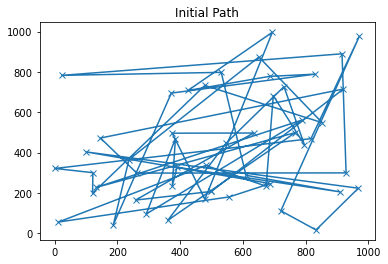

In [4]:
#Visualizing the Locations and Initial Path
n = len(locations)
plt.plot([locations[initial_path[k % n]][0] for k in range(n+1)], [locations[initial_path[k % n]][1] for k in range(n+1)], marker='x')
plt.title('Initial Path')


In [5]:
#Compute the total distance using the initial path
#We will use euclidean_distance to compute distance from location A to location B

total_distance_initial_path = 0

for i in range(len(initial_path)-1):
    location_1 = initial_path[i]
    location_2 = initial_path[i+1]
    coord_1 = locations[location_1]
    coord_2 = locations[location_2]
    distance = math.sqrt((coord_2[0]-coord_1[0])**2 + (coord_2[1]-coord_2[1])**2)
    total_distance_initial_path += distance

#Getting the distance from last location going back to the first location
last_location = initial_path[-1]
start_location = initial_path[0]
coord_last = locations[last_location]
coord_start = locations[start_location]
distance = math.sqrt((coord_last[0]-coord_start[0])**2 + (coord_last[1]-coord_start[1])**2)
total_distance_initial_path += distance
print('Total distance using the initial path:', round(total_distance_initial_path,2))

Total distance using the initial path: 15683.14


In [6]:
#Implementing the Simulated Annealing
path = initial_path #Use initial_path as the starting path
for k in np.logspace(0,5, num=100000)[::-1]: #Iterate the 'temperature' from k=100,000 down to 1, logarithmically
    [i,j] = random.sample(range(50),2) #Randomly pick two cities to swap
    
    #Generating new path using the randomly picked two cities
    new_path = path.copy()
    loc1 = new_path[i]
    loc2 = new_path[j]
    new_path[i] = loc2
    new_path[j] = loc1
    
    #Computing new path total distance
    total_distance_new_path = 0

    for i in range(len(new_path)-1):
        location_1 = new_path[i]
        location_2 = new_path[i+1]
        coord_1 = locations[location_1]
        coord_2 = locations[location_2]
        distance = math.sqrt((coord_2[0]-coord_1[0])**2 + (coord_2[1]-coord_2[1])**2)
        total_distance_new_path += distance
    
    #Getting the distance from last location going back to the first location
    last_location = new_path[-1]
    start_location = new_path[0]
    coord_last = locations[last_location]
    coord_start = locations[start_location]
    distance = math.sqrt((coord_last[0]-coord_start[0])**2 + (coord_last[1]-coord_start[1])**2)
    total_distance_new_path += distance
    
    
    #Computing old path total distance
    total_distance_old_path = 0

    for i in range(len(path)-1):
        location_1 = path[i]
        location_2 = path[i+1]
        coord_1 = locations[location_1]
        coord_2 = locations[location_2]
        distance = math.sqrt((coord_2[0]-coord_1[0])**2 + (coord_2[1]-coord_2[1])**2)
        total_distance_old_path += distance
    
    #Getting the distance from last location going back to the first location
    last_location = path[-1]
    start_location = path[0]
    coord_last = locations[last_location]
    coord_start = locations[start_location]
    distance = math.sqrt((coord_last[0]-coord_start[0])**2 + (coord_last[1]-coord_start[1])**2)
    total_distance_old_path += distance
    
    #Computing the acceptance probability
    from math import exp
    if total_distance_new_path < total_distance_old_path:
        acceptance_probability = 1.0
    else:
        acceptance_probability = exp((total_distance_old_path - total_distance_new_path)/k)
    
    #Determining whether to accept the new path or not
    if random.random() < acceptance_probability: #random.random is to randomly generate probability
        path = new_path
        

print('Here is the final path based on Simulated Annealing:', path) 
    

Here is the final path based on Simulated Annealing: [21, 24, 48, 37, 26, 42, 19, 31, 23, 12, 0, 10, 39, 5, 9, 47, 18, 44, 45, 29, 33, 28, 16, 6, 43, 36, 2, 49, 30, 20, 13, 40, 3, 8, 11, 38, 4, 22, 34, 25, 46, 41, 32, 1, 7, 14, 27, 17, 15, 35]


In [7]:
#Computing total distance of the path
total_distance_final_path = 0

for i in range(len(path)-1):
    location_1 = path[i]
    location_2 = path[i+1]
    coord_1 = locations[location_1]
    coord_2 = locations[location_2]
    distance = math.sqrt((coord_2[0]-coord_1[0])**2 + (coord_2[1]-coord_2[1])**2)
    total_distance_final_path += distance

#Getting the distance from last location going back to the first location
last_location = path[-1]
start_location = path[0]
coord_last = locations[last_location]
coord_start = locations[start_location]
distance = math.sqrt((coord_last[0]-coord_start[0])**2 + (coord_last[1]-coord_start[1])**2)
total_distance_final_path += distance
print('Total distance using Simulated Annealing:', round(total_distance_final_path,2))
print('The difference between the initial path and final path:', round(total_distance_initial_path - total_distance_final_path,2))

Total distance using Simulated Annealing: 1941.29
The difference between the initial path and final path: 13741.85


Text(0.5, 1.0, 'Simulated Annealing Final Path')

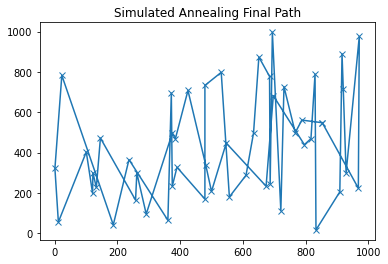

In [8]:
#Visualizing the final path
n = len(locations)
plt.plot([locations[path[k % n]][0] for k in range(n+1)], [locations[path[k % n]][1] for k in range(n+1)], marker='x')
plt.title('Simulated Annealing Final Path')

### Conclusion ###
The initial path's total distance is 15683.14. The Simulated Annealing Path total distance is 1941.29 which is significantly better compared to the initial path. 

**Note:** There might be other better path combinations available. Simulated Annealing does not always provide an optimal solution.